# ECSE 551 — Assignment 1
_Group: Lukas Kuhzarani  •  Kernel: ecse551-a1  •  Random state: 42_


In [3]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

RANDOM_STATE = 42
pd.set_option("display.precision", 4)


In [ ]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame.rename(columns=lambda c: c.replace(" (cm)", ""))

# Readable Class names
df_iris["species"] = df_iris["target"].map(dict(enumerate(iris.target_names)))
print("Shape (rows, cols):", df_iris.shape)
df_iris.head()



Shape (rows, cols): (150, 6)
Class counts (by numeric target):
target
0    50
1    50
2    50
Name: count, dtype: int64

Class counts (by species name):
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


,sepal length,sepal width,petal length,petal width
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


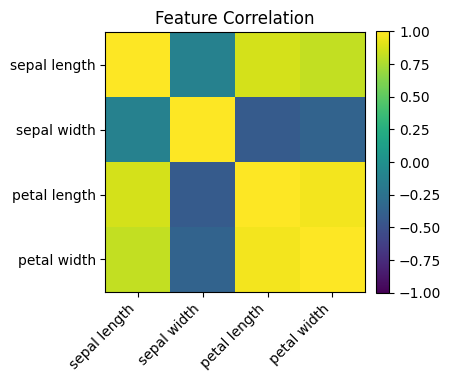

In [8]:
features = ["sepal length", "sepal width", "petal length", "petal width"]
#Basic statistics
display(df_iris[features].describe())
#Correlation matrix
corr = df_iris[features].corr()

#Heatmap for correlation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4.5,4))
im = ax.imshow(corr, vmin=-1, vmax=1)
ax.set_xticks(range(len(features))); ax.set_yticks(range(len(features)))
ax.set_xticklabels(features, rotation=45, ha='right'); ax.set_yticklabels(features)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Feature Correlation"); plt.tight_layout(); plt.show()


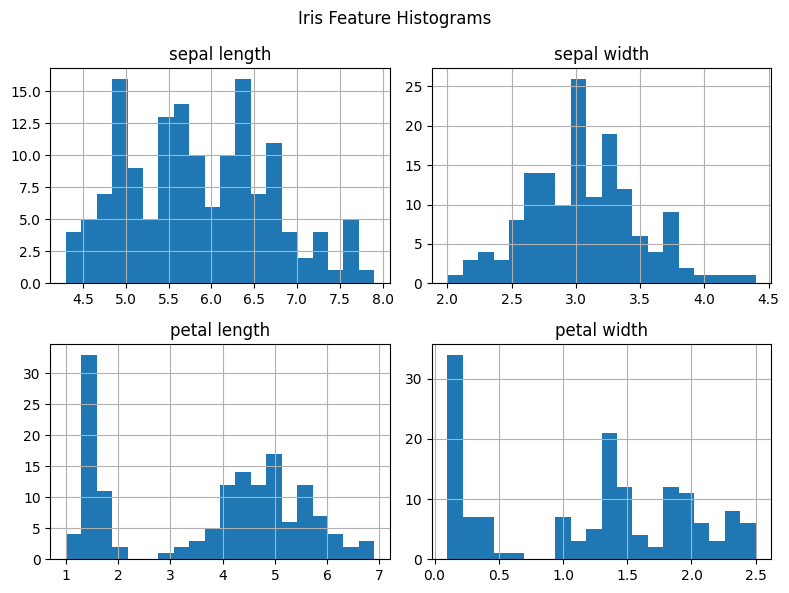

In [9]:
#Histograms
axes = df_iris[features].hist(bins=20,figsize=(8,6))
plt.suptitle("Iris Feature Histograms"); plt.tight_layout();    plt.show()

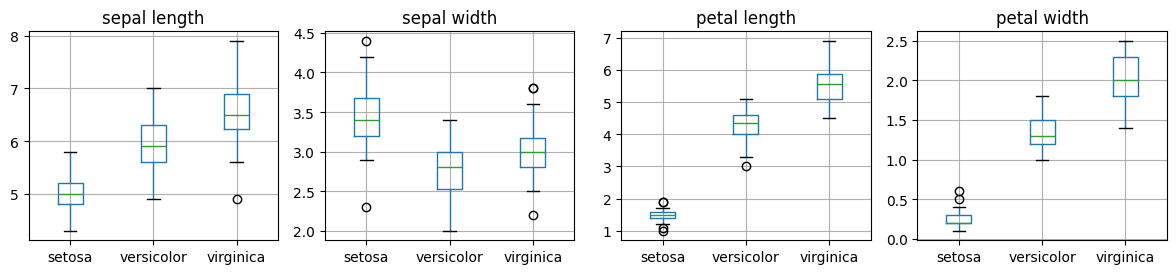

In [10]:
#Boxplots by Species
fig, axs = plt.subplots(1, 4, figsize=(12,3), sharey=False)
for ax, col in zip(axs, features):
    df_iris.boxplot(column=col, by="species", ax=ax)
    ax.set_title(col); ax.set_xlabel(""); ax.set_ylabel("")
plt.suptitle(""); plt.tight_layout(); plt.show()

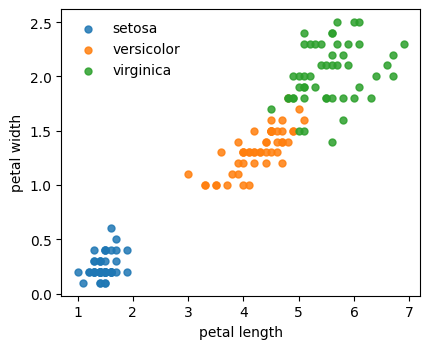

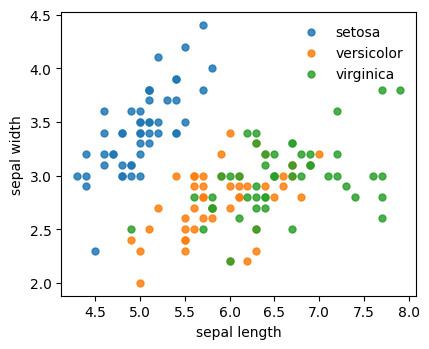

In [12]:
#Scatter Plots
colors = {"setosa":"tab:blue", "versicolor":"tab:orange", "virginica":"tab:green"}
def cls_scatter(xcol, ycol):
    plt.figure(figsize=(4.4,3.6))
    for sp, sub in df_iris.groupby("species"):
        plt.scatter(sub[xcol],sub[ycol], s=25, alpha=0.85, label=sp, c=colors[sp])
    plt.xlabel(xcol); plt.ylabel(ycol); plt.legend(frameon=False); plt.tight_layout(); plt.show()
cls_scatter("petal length", "petal width")   # most separation
cls_scatter("sepal length",  "sepal width")  # weaker separation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

x = df_iris[features].to_numpy() # feature matrix as numpy array
y = df_iris["target"].to_numpy() # class labels as integers

#Calculate mew and sigma from training data only
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler().fit(X_train)

#Standardization with Training mew and simgma
X_train_s = scaler.transform(X_train) #mean = 0, std = 1
X_test_s  = scaler.transform(X_test)

print("μ≈0:", X_train_s.mean(axis=0))
print("σ≈1:", X_train_s.std(axis=0, ddof=0))


μ≈0: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
σ≈1: [1. 1. 1. 1.]
